# EPIC COMPETITION

## INITIAL SETTING

In [1]:
# if use colab run this line:

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## LOAD DATA :


In [0]:
# load data:
import json
import pandas as pd

with open('gdrive/My Drive/articles.json', 'r') as f:
    data_one = json.load(f)
articles = pd.DataFrame(data_one)

In [0]:

with open('gdrive/My Drive/tweets.json', 'r') as f:
    data = json.load(f)
tweets = pd.DataFrame(data)

In [0]:
with open('gdrive/My Drive/twitter_influencers.json') as f:
    data_two = json.load(f)
influencers = pd.DataFrame(data_two)

## HAVE A LOOK AT DATA FRAME:

In [0]:
articles.head()


,article_id,authors,contents,excerpt,fb_data,has_video,headline,image_link,keywords,li_data,link,max_velocity,pi_data,publication_timestamp,sentiment,source,topics,tw_data,velocity
0,757aab00-d16e-11e6-ab89-c11942898bd6,[Tom Boggioni],A man who went on a racist and gay-bashing ran...,A man who went on a racist and gay-bashing ran...,"{'total_engagement_count': 6059, 'likes': 0, '...",True,‘You want to hear me f*cking yelling?’: US-bou...,http://www.rawstory.com/wp-content/uploads/201...,,{'li_count': 0},http://www.rawstory.com/2017/01/you-want-to-he...,54.541396,{'pi_count': 7},1483418302896,-1.0,"{'publisher': 'rawstory.com', 'link': 'http://...","[{'id': 19, 'name': 'Opinion'}, {'id': 23, 'na...",{'tw_count': 150},0.174795
1,336914f0-d1d6-11e6-ab89-c11942898bd6,"[Thom Patterson, Tara Mulholland]",Baggage handler trapped in cargo hold during f...,United Airlines is investigating how a baggage...,"{'total_engagement_count': 2063, 'likes': 0, '...",True,Baggage handler trapped in cargo hold during f...,http://i2.cdn.cnn.com/cnnnext/dam/assets/17010...,"aviation, Baggage handler trapped in cargo hol...",{'li_count': 2},http://www.cnn.com/2017/01/03/aviation/trapped...,211.362491,{'pi_count': 0},1483461717000,0.0,"{'publisher': 'cnn.com', 'link': 'http://cnn.c...","[{'id': 2, 'name': 'News'}, {'id': 668, 'name'...",{'tw_count': 560},0.054310
2,18c3ac90-d2d6-11e6-ab89-c11942898bd6,[Stephanie Ramirez],"TERLING, VA (WUSA9) - A Virginia family’s nigh...",A Virginia family's nightmare: a man said Unit...,"{'total_engagement_count': 2086, 'likes': 0, '...",False,United Airlines leaves Virginia minor stranded...,http://content.wusa9.com/photo/2017/01/04/UA_t...,"transportation in the united states,logan inte...",{'li_count': 1},http://www.wusa9.com/news/local/virginia/unite...,55.838421,{'pi_count': 0},1483572271000,-1.0,"{'publisher': 'wusa9.com', 'link': 'http://wus...","[{'id': 2, 'name': 'News'}]",{'tw_count': 20},0.015086
3,76509020-d093-11e6-8d6f-9f4c7b0f94de,[Corazon Miller],United Airlines New Year's Day flight bound f...,A man was arrested after it was claimed he had...,"{'total_engagement_count': 1737, 'likes': 0, '...",False,Passenger arrested after United Airlines fligh...,http://media.nzherald.co.nz/webcontent/image/j...,"Business, Aviation, Airlines, Australia, Sydne...",{'li_count': 6},http://www.nzherald.co.nz/business/news/articl...,97.729933,{'pi_count': 0},1483324244514,0.0,"{'publisher': 'nzherald.co.nz', 'link': 'http:...","[{'id': 2, 'name': 'News'}, {'id': 28, 'name':...",{'tw_count': 100},0.115518
4,581aad60-d1e8-11e6-ab89-c11942898bd6,[Jordi Lippe-McGraw],A normal day on the job turned into an hour-lo...,A normal day on the job turned into a harrowin...,"{'total_engagement_count': 1552, 'likes': 0, '...",True,United Airlines Baggage Handler Locked in Plan...,https://media.cntraveler.com/photos/555a3a1156...,"Travel Intel,Air Travel,",{'li_count': 1},http://www.cntraveler.com/story/united-airline...,168.280986,{'pi_count': 2},1483470652214,0.0,"{'publisher': 'cntraveler.com', 'link': 'http:...","[{'id': 19, 'name': 'Opinion'}, {'id': 443, 'n...",{'tw_count': 20},0.420485


In [0]:
tweets.head()



,created_at,id,id_str,text,truncated,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status,scopes,withheld_scope,withheld_copyright,withheld_in_countries,retweeted_status
0,Thu Oct 18 13:15:17 +0000 2018,1052910994303926274,1052910994303926274,United Airlines: Still no plan to allow free c...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1052910993045708802, 'id_str...","<a href=""https://trueanthem.com/"" rel=""nofollo...",NaN,None,NaN,None,None,"{'id': 14268564, 'id_str': '14268564', 'name':...",None,None,None,None,False,1,2,False,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tue Jan 15 17:30:30 +0000 2019,1085227741753065472,1085227741753065472,Your opportunity to explore the #Motherland is...,True,"{'hashtags': [{'text': 'Motherland', 'indices'...",NaN,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",NaN,None,NaN,None,None,"{'id': 1872686198, 'id_str': '1872686198', 'na...",None,None,None,None,False,2,6,False,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Wed Apr 12 02:20:03 +0000 2017,851983220094709762,851983220094709762,United Airlines stock drops $1.4 billion after...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://www.socialflow.com"" rel=""nofol...",NaN,None,NaN,None,None,"{'id': 14293310, 'id_str': '14293310', 'name':...",None,None,None,None,False,1090,1690,False,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tue Apr 11 00:04:09 +0000 2017,851586631463182337,851586631463182337,Experts surprised United Airlines opted to for...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 851586628678164481, 'id_str'...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,None,NaN,None,None,"{'id': 36511031, 'id_str': '36511031', 'name':...",None,None,None,None,False,5,7,False,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tue Apr 11 12:30:54 +0000 2017,851774556037668864,851774556037668864,China internet outcry over United Passenger fi...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 851774323542982656, 'id_str'...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,None,NaN,None,None,"{'id': 37034483, 'id_str': '37034483', 'name':...",None,None,None,None,False,6,17,False,False,False,da,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
influencers.head()


,twitter_id,twitter_handle,likes_count,followers_count,following_count,statuses_count,max_retweet_value,social_referrals
0,759251,CNN,1437,41830534,1108,238672,97,[{'article_id': '336914f0-d1d6-11e6-ab89-c1194...
1,1932657667,drudgeheadlines,273,168535,1,133104,68,[{'article_id': '0648ed40-d16a-11e6-ab89-c1194...
2,14293310,TIME,517,15966353,410,316491,58,[{'article_id': '97c8d860-d1ca-11e6-ab89-c1194...
3,116502194,globalnews,8901,329225,1142,198323,31,[{'article_id': 'efc970d0-d1b9-11e6-ab89-c1194...
4,15012486,CBSNews,287,6713169,440,211618,28,[{'article_id': '582c0590-d1b3-11e6-ab89-c1194...


## SENTIMENTS ANALYSIS 

In [0]:
# HELPING FUNCTION:
import datetime
'''
TRANSFER THE TIMESTAMP TO DATETIME FRAME IN ARTICLE DATASET (format: year-month)
input: index 
output datetime
'''
def get_time(i):
  timestamp = datetime.datetime.fromtimestamp(articles["publication_timestamp"][i]*1e-3)
  return (timestamp.strftime('%Y-%m'))


def get_time2(thg):
  timestamp = datetime.datetime.fromtimestamp(thg*1e-3)
  return (timestamp.strftime('%Y-%m-%d'))

In [0]:
# GET THE TIME AND SENTIMENTS MATRIX(numpy array)
import numpy as np

sentiment_data=[]
for i in range(len(articles)):
  sentiment_data.append([get_time(i),articles["sentiment"][i]])
sentiment_data=np.array(sentiment_data)

In [0]:
# FUNCTION TO SPLIT THE SENTIMENTS DATA BY SENTIMENTS AND TIME: 
'''
input: sentiments(0/1/-1) 
output data_dict
'''
def sentiments_split(sentiments):
  data_dict={}
  for i in range(len(articles)):
    if float(sentiment_data[i,1])==sentiments:
      if sentiment_data[i,0] in data_dict.keys():
        data_dict[sentiment_data[i,0]]+=1
      else:
        data_dict[sentiment_data[i,0]]=0
  return data_dict

In [0]:
# SPLIT:
positive_dict=sentiments_split(1.0)
negative__dict=sentiments_split(-1.0)
neutral_dict=sentiments_split(0.0)

In [0]:
# PROCESS_DATA:
# sort the date:
date_x=list(set(sentiment_data[:,0]))
date_x.sort()
# each sentiments y value:
negative_y=[]
positive_y=[]
neutral_y=[]
for day in date_x:
  negative_y.append(negative__dict[day])
  positive_y.append(positive_dict[day])
  neutral_y.append(neutral_dict[day])




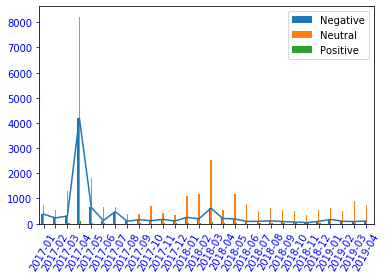

In [10]:
# PLOT GRAPH:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

width = .35 # width of a bar

m1_t = pd.DataFrame({
 'Negative' : negative_y,
 'Neutral' : neutral_y,
 'Positive' : positive_y,
 'LINE' : negative_y })

m1_t[['Negative','Neutral','Positive']].plot(kind='bar', width = width)
m1_t['LINE'].plot()

ax = plt.gca()
plt.xlim([-width, len(m1_t['Negative'])-width])
ax.set_xticklabels((date_x),rotation=60)
ax.tick_params(colors='blue')
plt.show()

In [0]:
# SAVE TO CSV FILE:
data={}
data["date"]=date_x
data["positive"]=positive_y
data["negative"]=negative_y
data["neutral"]=neutral_y
df = pd.DataFrame(data)
export_csv = df.to_csv ("gdrive/My Drive/sentiments.csv")

## TOP 10 ARTICLEA:

In [13]:
# load the data :
data = pd.read_csv("gdrive/My Drive/Top_articles_with_highestEngagement.csv")
data.head()

,article_id,fb_count,tw_count,Social_count,tw_Time,public_Time
0,9483c3f0-26f0-11e8-8b25-ef989ddb8d11,660561,4726,665287,Sun Mar 18 19:26:59 +0000 2018,1520967328000
1,b7082c20-1ea6-11e7-97f1-c11942898bd6,438322,12000,450322,Wed Apr 12 05:21:00 +0000 2017,1491908409000
2,c3c3caa0-1e8d-11e7-a115-89fb30ac38ce,275671,1120,276791,Wed Jan 09 11:10:02 +0000 2019,1491897933000
3,7eb7c800-74bb-11e8-b53e-d7f3856009ab,192736,1866,194602,Sun Jul 22 16:23:07 +0000 2018,1529520742000
4,539c9450-1e10-11e7-8654-371974c75eb5,165909,3360,169269,Thu Apr 27 19:28:33 +0000 2017,1491843200000


In [0]:
# get the top 10:
top_10=data["article_id"][:100].tolist()

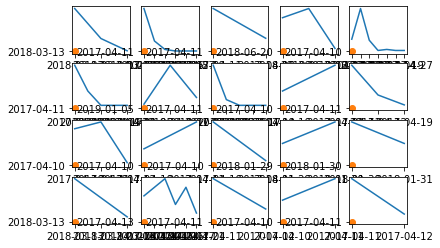

In [28]:
figure=plt.figure()
t=1


m=33
for m in range(20):
    # original data -> twitter create date
  id1=top_10[m]
  timeline=[]
  articles_id=articles["article_id"].tolist()
  id=articles_id.index(id1)
  origin=get_time2(articles["publication_timestamp"][id])
  #timeline.append(origin)
  # get twitter time and articles 
  twitter_time=[]
  twitter_articles=[]
  for i in range(len(influencers)):
    twitter_articles.append(influencers["social_referrals"][i][0]["article_id"])
    twitter_time.append(influencers["social_referrals"][i][0]["created_at"])
  # the article picked by twitter:
  twitter_articles=np.array(twitter_articles)
  index=np.where(twitter_articles==id1)
  time_list=[]
  for time in index[0]:
    time_list.append(get_time2(twitter_time[time]))
  # count day
  time_dict={}
  for day in time_list:
    if day in time_dict.keys():
      time_dict[day]+=1
    else:
      time_dict[day]=1
  # plot_prepare:
  time_list=list(set(time_list))
  time_list.sort()
  timeline.extend(time_list)
  time_x=timeline[:]
  #plot:
  number_y=[]
  for day in time_x:
    number_y.append(time_dict[day])

  # saveit(m,time_x,number_y,origin)
  plt.subplot(4,5,m+1)
  plt.plot(time_x,number_y)
  plt.plot(origin,"o")


In [0]:
# save to csv file:
def saveit(m,time_x,number_y,origin):
  data={}
  data["date"]=time_x
  data["number"]=number_y
  data["origin"]=origin
  df = pd.DataFrame(data)
  export_csv = df.to_csv ("gdrive/My Drive/top%i.csv" %m)

In [0]:
# original data -> twitter create date
id1=top_10[1]
timeline=[]
articles_id=articles["article_id"].tolist()
id=articles_id.index(id1)
origin=get_time2(articles["publication_timestamp"][id])
#timeline.append(origin)

In [0]:
influencers.head()

,twitter_id,twitter_handle,likes_count,followers_count,following_count,statuses_count,max_retweet_value,social_referrals
0,759251,CNN,1437,41830534,1108,238672,97,[{'article_id': '336914f0-d1d6-11e6-ab89-c1194...
1,1932657667,drudgeheadlines,273,168535,1,133104,68,[{'article_id': '0648ed40-d16a-11e6-ab89-c1194...
2,14293310,TIME,517,15966353,410,316491,58,[{'article_id': '97c8d860-d1ca-11e6-ab89-c1194...
3,116502194,globalnews,8901,329225,1142,198323,31,[{'article_id': 'efc970d0-d1b9-11e6-ab89-c1194...
4,15012486,CBSNews,287,6713169,440,211618,28,[{'article_id': '582c0590-d1b3-11e6-ab89-c1194...


In [0]:
# get twitter time and articles 
twitter_time=[]
twitter_articles=[]
for i in range(len(influencers)):
  twitter_articles.append(influencers["social_referrals"][i][0]["article_id"])
  twitter_time.append(influencers["social_referrals"][i][0]["created_at"])

In [0]:
# the article picked by twitter:
twitter_articles=np.array(twitter_articles)
index=np.where(twitter_articles==id1)
time_list=[]
for time in index[0]:
  time_list.append(get_time2(twitter_time[time]))

In [0]:
# count day
time_dict={}
for day in time_list:
  if day in time_dict.keys():
    time_dict[day]+=1
  else:
    time_dict[day]=1

In [0]:
# plot_prepare:
list(set(time_list)).sort()
timeline.extend(time_list)
time_x=timeline[:]


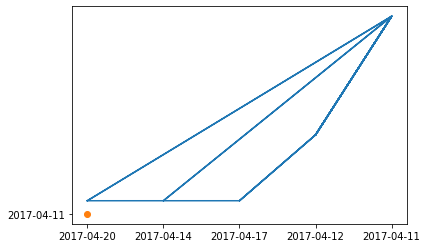

In [0]:
#plot:
number_y=[]
for day in time_x:
  number_y.append(time_dict[day])
plt.plot(time_x,number_y)
plt.plot(origin,"o")